# Titanic - Classification 

## In this lesson, we will analyze the deaths and survivors on the Titanic ship, apply the Classification model, and then save the test file and score it in Kaggle.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('ttrain.csv')

In [3]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
df2=pd.read_csv('ttest.csv')

In [5]:
df2.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [6]:
df=pd.concat([df,df2])  #iki tabloyu birlestirdik

In [7]:
df

PassengerId  Survived  Pclass  \
0              1       0.0       3   
1              2       1.0       1   
2              3       1.0       3   
3              4       1.0       1   
4              5       0.0       3   
..           ...       ...     ...   
413         1305       NaN       3   
414         1306       NaN       1   
415         1307       NaN       3   
416         1308       NaN       3   
417         1309       NaN       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
413                                 Spector, Mr. Woolf    male   NaN      0   
414                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
415                       Saether, Mr. Simon Sivertsen    male  38.5      0   
416                                Ware, Mr. Frederick    male   NaN      0   
417                           Peter, Master. Michael J    male   NaN      1   

     Parch              Ticket      Fare Cabin Embarked  
0        0           A/5 21171    7.2500   NaN        S  
1        0            PC 17599   71.2833   C85        C  
2        0    STON/O2. 3101282    7.9250   NaN        S  
3        0              113803   53.1000  C123        S  
4        0              373450    8.0500   NaN        S  
..     ...                 ...       ...   ...      ...  
413      0           A.5. 3236    8.0500   NaN        S  
414      0            PC 17758  108.9000  C105        C  
415      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416      0              359309    8.0500   NaN        S  
417      1                2668   22.3583   NaN        C  

[1309 rows x 12 columns]

In [8]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [9]:
df.corr(numeric_only=True)

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.038354  0.028814 -0.055224  0.008942   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.038354 -0.338481  1.000000 -0.408106  0.060832  0.018322   
Age             0.028814 -0.077221 -0.408106  1.000000 -0.243699 -0.150917   
SibSp          -0.055224 -0.035322  0.060832 -0.243699  1.000000  0.373587   
Parch           0.008942  0.081629  0.018322 -0.150917  0.373587  1.000000   
Fare            0.031428  0.257307 -0.558629  0.178740  0.160238  0.221539   

                 Fare  
PassengerId  0.031428  
Survived     0.257307  
Pclass      -0.558629  
Age          0.178740  
SibSp        0.160238  
Parch        0.221539  
Fare         1.000000

In [10]:
df.describe()

PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.881138     0.498854   
std     378.020061    0.486592     0.837836    14.413493     1.041658   
min       1.000000    0.000000     1.000000     0.170000     0.000000   
25%     328.000000    0.000000     2.000000    21.000000     0.000000   
50%     655.000000    0.000000     3.000000    28.000000     0.000000   
75%     982.000000    1.000000     3.000000    39.000000     1.000000   
max    1309.000000    1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1309.000000  1308.000000  
mean      0.385027    33.295479  
std       0.865560    51.758668  
min       0.000000     0.000000  
25%       0.000000     7.895800  
50%       0.000000    14.454200  
75%       0.000000    31.275000  
max       9.000000   512.329200

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [12]:
df['Age'].value_counts()

Age
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: count, Length: 98, dtype: int64

In [13]:
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.')

In [14]:
df['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [15]:
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Dona','Lady'],'Mrs')
df['Title']=df['Title'].replace(['Rev','Dr','Col','Major','Don','Capt','Sir','Jonkheer'],'Mr')

In [16]:
df['Title'].value_counts()

Title
Mr        783
Miss      264
Mrs       201
Master     61
Name: count, dtype: int64

In [17]:
df['Age']=df['Age'].fillna(df.groupby('Title')['Age'].transform('median'))

In [18]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
dtype: int64

In [19]:
df['Fare'].value_counts()

Fare
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
7.7417      1
8.1583      1
8.4583      1
7.8000      1
7.7208      1
Name: count, Length: 281, dtype: int64

In [20]:
df['Fare'].mean()

33.29547928134557

In [21]:
df['Fare']=df['Fare'].fillna(df['Fare'].mode()[0])

In [22]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
Title             0
dtype: int64

In [23]:
df['Cabin'].value_counts()

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: count, Length: 186, dtype: int64

In [24]:
import seaborn as sns

<Axes: xlabel='Embarked', ylabel='count'>

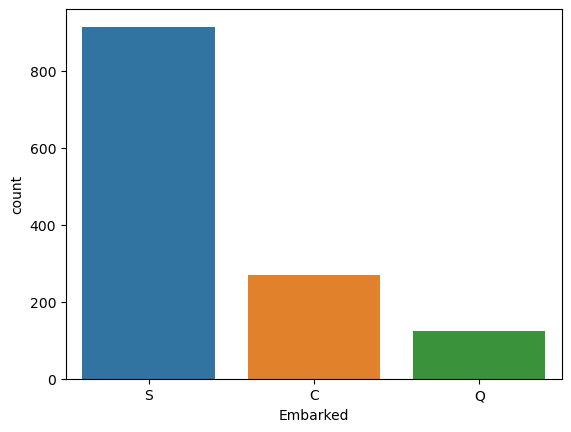

In [25]:
sns.countplot(x=df['Embarked'])

In [26]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [27]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [29]:
df

PassengerId  Survived  Pclass  \
0              1       0.0       3   
1              2       1.0       1   
2              3       1.0       3   
3              4       1.0       1   
4              5       0.0       3   
..           ...       ...     ...   
413         1305       NaN       3   
414         1306       NaN       1   
415         1307       NaN       3   
416         1308       NaN       3   
417         1309       NaN       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
413                                 Spector, Mr. Woolf    male  30.0      0   
414                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
415                       Saether, Mr. Simon Sivertsen    male  38.5      0   
416                                Ware, Mr. Frederick    male  30.0      0   
417                           Peter, Master. Michael J    male   4.0      1   

     Parch              Ticket      Fare Cabin Embarked   Title  
0        0           A/5 21171    7.2500   NaN        S      Mr  
1        0            PC 17599   71.2833   C85        C     Mrs  
2        0    STON/O2. 3101282    7.9250   NaN        S    Miss  
3        0              113803   53.1000  C123        S     Mrs  
4        0              373450    8.0500   NaN        S      Mr  
..     ...                 ...       ...   ...      ...     ...  
413      0           A.5. 3236    8.0500   NaN        S      Mr  
414      0            PC 17758  108.9000  C105        C     Mrs  
415      0  SOTON/O.Q. 3101262    7.2500   NaN        S      Mr  
416      0              359309    8.0500   NaN        S      Mr  
417      1                2668   22.3583   NaN        C  Master  

[1309 rows x 13 columns]

In [30]:
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [31]:
df=pd.get_dummies(df,drop_first=True)

In [32]:
train=df[:891]
test=df[891:]

In [33]:
x=train.drop(['Survived'],axis=1)
y=train['Survived']

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
g=GaussianNB()
b=BernoulliNB()
r=RandomForestClassifier()
gr=GradientBoostingClassifier()

In [36]:
test

Survived  Pclass   Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
0         NaN       3  34.5      0      0    7.8292      True        True   
1         NaN       3  47.0      1      0    7.0000     False       False   
2         NaN       2  62.0      0      0    9.6875      True        True   
3         NaN       3  27.0      0      0    8.6625      True       False   
4         NaN       3  22.0      1      1   12.2875     False       False   
..        ...     ...   ...    ...    ...       ...       ...         ...   
413       NaN       3  30.0      0      0    8.0500      True       False   
414       NaN       1  39.0      0      0  108.9000     False       False   
415       NaN       3  38.5      0      0    7.2500      True       False   
416       NaN       3  30.0      0      0    8.0500      True       False   
417       NaN       3   4.0      1      1   22.3583      True       False   

     Embarked_S  Title_Miss  Title_Mr  Title_Mrs  
0         False       False      True      False  
1          True       False     False       True  
2         False       False      True      False  
3          True       False      True      False  
4          True       False     False       True  
..          ...         ...       ...        ...  
413        True       False      True      False  
414       False       False     False       True  
415        True       False      True      False  
416        True       False      True      False  
417       False       False     False      False  

[418 rows x 12 columns]

In [37]:
test1=test.drop('Survived',axis=1)

In [38]:
test1.shape

(418, 11)

In [39]:
test1

Pclass   Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  Embarked_S  \
0         3  34.5      0      0    7.8292      True        True       False   
1         3  47.0      1      0    7.0000     False       False        True   
2         2  62.0      0      0    9.6875      True        True       False   
3         3  27.0      0      0    8.6625      True       False        True   
4         3  22.0      1      1   12.2875     False       False        True   
..      ...   ...    ...    ...       ...       ...         ...         ...   
413       3  30.0      0      0    8.0500      True       False        True   
414       1  39.0      0      0  108.9000     False       False       False   
415       3  38.5      0      0    7.2500      True       False        True   
416       3  30.0      0      0    8.0500      True       False        True   
417       3   4.0      1      1   22.3583      True       False       False   

     Title_Miss  Title_Mr  Title_Mrs  
0         False      True      False  
1         False     False       True  
2         False      True      False  
3         False      True      False  
4         False     False       True  
..          ...       ...        ...  
413       False      True      False  
414       False     False       True  
415       False      True      False  
416       False      True      False  
417       False     False      False  

[418 rows x 11 columns]

In [40]:
g.fit(x,y)
tahmin1=g.predict(test1)

In [41]:
tahmin1=pd.DataFrame(tahmin1)

In [42]:
tahmin1

0
0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
..   ...
413  0.0
414  1.0
415  0.0
416  0.0
417  0.0

[418 rows x 1 columns]

In [43]:
sonuc1=pd.DataFrame()

In [44]:
sonuc1['PassengerId']=df2['PassengerId']
sonuc1['Survived']=tahmin1

In [46]:
sonuc1['Survived']=sonuc1['Survived'].astype('int32')

In [47]:
sonuc1.to_csv('titanic_tahmin1.csv',index=False)

In [48]:
b.fit(x,y)
tahmin2=b.predict(test1)

In [49]:
tahmin2

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [50]:
sonuc2=pd.DataFrame()

In [51]:
sonuc2

Empty DataFrame
Columns: []
Index: []

In [52]:
sonuc2['PassengerId']=df2['PassengerId']
sonuc2['Survived']=tahmin2

In [53]:
sonuc2

PassengerId  Survived
0            892       0.0
1            893       1.0
2            894       0.0
3            895       0.0
4            896       1.0
..           ...       ...
413         1305       0.0
414         1306       1.0
415         1307       0.0
416         1308       0.0
417         1309       1.0

[418 rows x 2 columns]

In [54]:
sonuc2['Survived']=sonuc2['Survived'].astype('int32')

In [55]:
sonuc2.to_csv("titanic_tahmin2.csv",index=False)

In [56]:
r.fit(x,y)
tahmin3=r.predict(test1)

In [57]:
sonuc3=pd.DataFrame()
sonuc3['PassengerId']=df2['PassengerId']
sonuc3['Survived']=tahmin3

In [58]:
sonuc3['Survived']=sonuc3['Survived'].astype('int32')

In [59]:
sonuc3.to_csv('Titanic_tahmin3.csv',index=False)

In [60]:
gr.fit(x,y)
tahmin4=gr.predict(test1)

In [61]:
sonuc4=pd.DataFrame()
sonuc4['PassengerId']=df2['PassengerId']
sonuc4['Survived']=tahmin4

In [62]:
sonuc4['Survived']=sonuc4['Survived'].astype('int32')

In [ ]:
# sonuc4 score is 0.77